## Clustering: Modeling: Introduction to K-Means

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

!pip install pydataset

# Part 1: Lesson

# Part 2: Exercises (iris, mall)


k-Means


Step 1:  Randomly(ish) **choose k starting centers**

Step 2: Use distance calculations to **assign every point to the cluster of whatever centroid each point is closest to**
     
Step 3: **Reposition the centroids** by calculating the mean of each dimension of the collective points that have been assigned to each cluster.

Step 4+: **Iterate.** Now that we have moved centroids, re-assign your points and repeat the process, until the centers stop moving.

---
---

In [12]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [13]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [14]:
# define independent variables for k-means

X = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

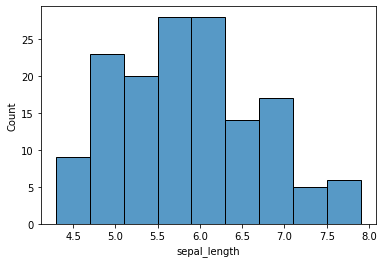

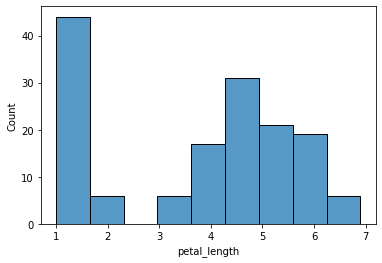

In [15]:
# look at distribution of sepal length and petal_length

sns.histplot(iris[X[0]])
plt.show()
sns.histplot(iris[X[2]])
plt.show()

In [16]:
y = iris.pop("species")

# Scale the X

scaler = MinMaxScaler().fit(iris)
X_scaled = pd.DataFrame(scaler.transform(iris), columns= iris.columns).set_index([iris.index.values])

In [17]:
# look at the head
X_scaled.head(1)

,sepal_length,sepal_width,petal_length,petal_width
1,0.222222,0.625,0.067797,0.041667


In [18]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [19]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [20]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,cluster
68,5.8,2.7,4.1,1.0,2
94,5.0,2.3,3.3,1.0,2


In [21]:
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,6.846154,5.702564
1,5.006000,1.462000
2,5.888525,4.396721


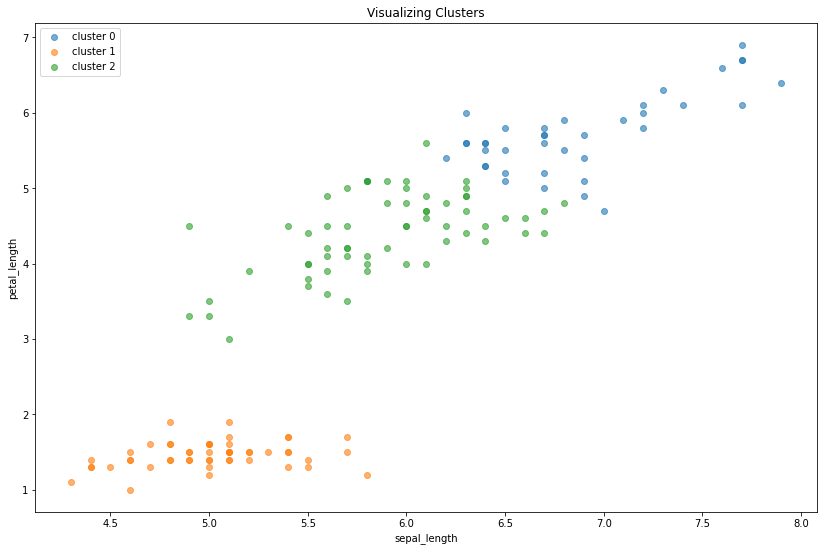

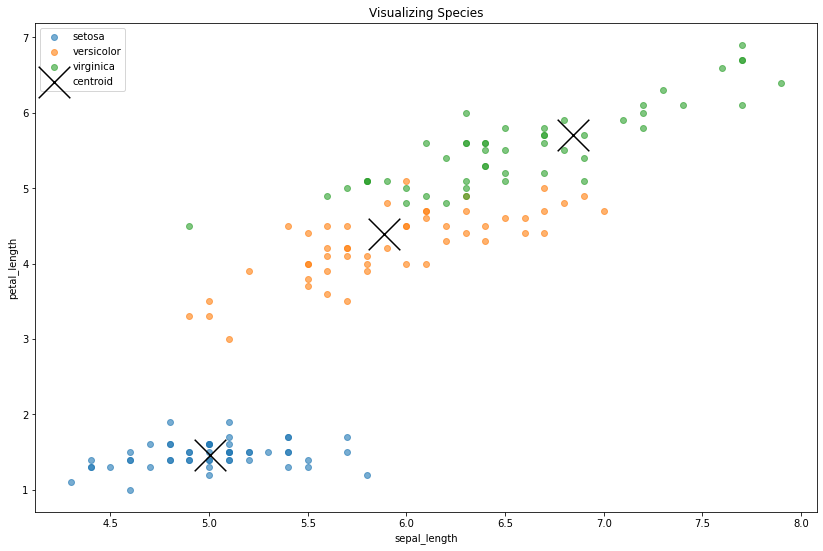

In [22]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby(y):
    plt.scatter(subset.sepal_length, subset.petal_length, label=str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Species')
plt.show()

### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [23]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [24]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X)
centroids_scaled #another way?

,sepal_length,sepal_width,petal_length,petal_width
0,0.707265,0.450855,0.797045,0.824786
1,0.196111,0.595000,0.078305,0.060833
2,0.441257,0.307377,0.575715,0.549180


In [25]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Visualizing Cluster Centers')

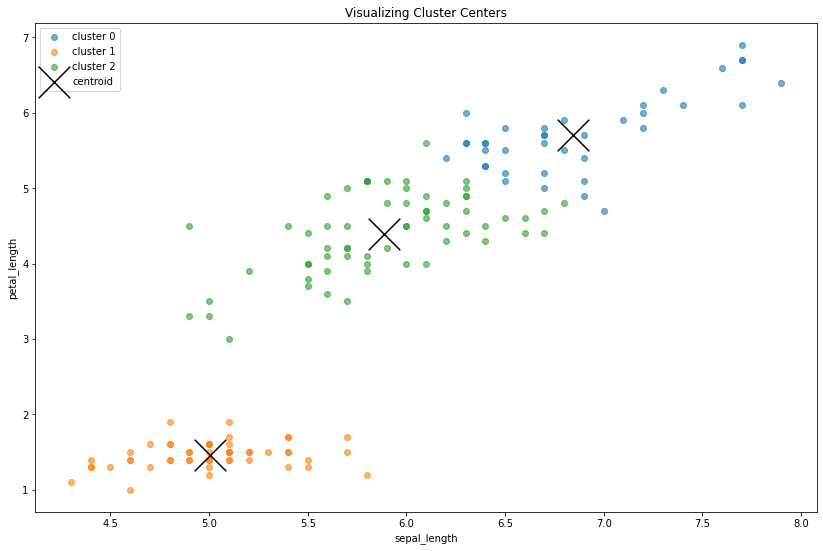

In [26]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

## How to choose 'k'

#### The human element: Domain knowledge, intuition and prior knowledge
 - Do you have an understanding for how many markets might exist?
 - Do you have knowledge of some grouping that isnt referenced in your existing features?
 - Did you observe specific observable clusters in your exploratory data analysis?

#### The computational element: Elbow Method
 - Try different k values and evaluate results
 - Inertia is a term that describes the sum of squared distances from each point to it's assigned centroid  
 - Inertia asymptotically approaches zero as we increase k.
 - We can observe a point where the interia begins to reduce less significantly, "the elbow"

In [27]:
# We can observe interia as a baked in property of our kmeans object
kmeans.inertia_

6.982216473785234

In [28]:
X = iris[['petal_length', 'sepal_length']]

scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k = 3

kmeans2 = KMeans(n_clusters= k)
kmeans2.fit(X_scaled)
kmeans2.inertia_

2.7292451122979937

In [29]:
# interia with k = 4

KMeans(n_clusters = 4).fit(X_scaled).inertia_


1.7860185767839216

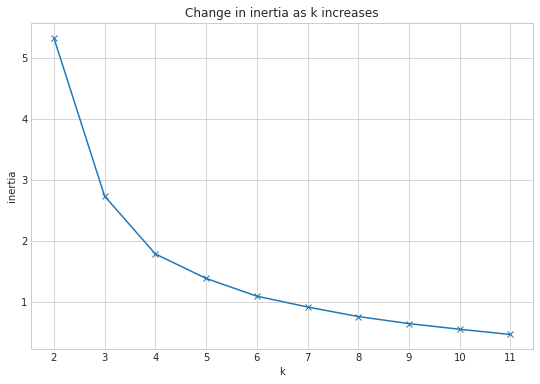

In [30]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

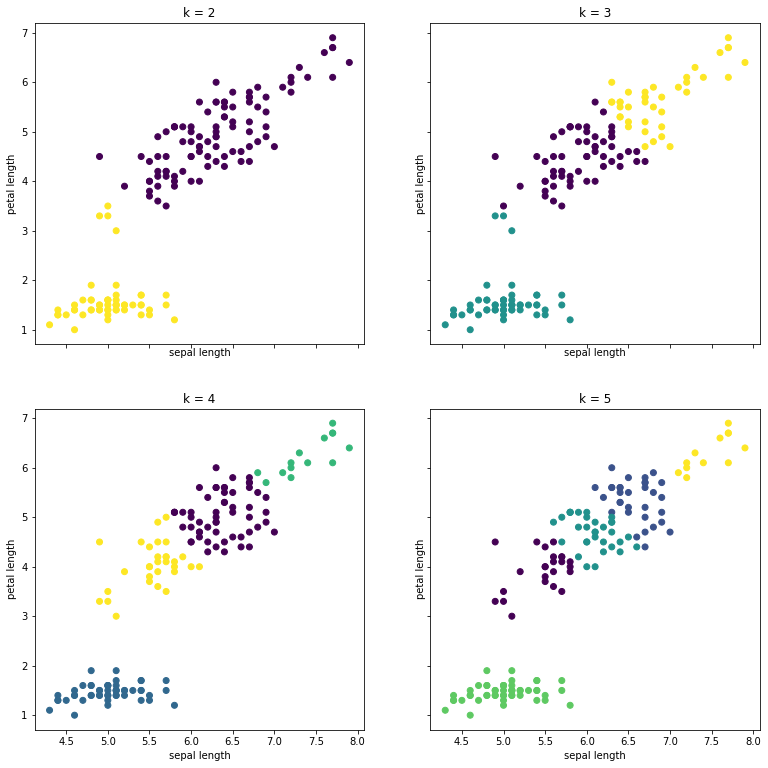

In [31]:
# What value of k is appropriate? 3

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

## Using Widths!

In [75]:
from sklearn.metrics import silhouette_score, fowlkes_mallows_score, f1_score
from sklearn.pipeline import make_pipeline

xvars = ['petal_width', 'sepal_width']
X = iris[xvars]
kmeans3 = make_pipeline(MinMaxScaler(), KMeans(n_clusters = 3))
kmeans3.fit(X)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [76]:
species_dict = {'setosa':0, 'versicolor':1, 'virginica':2}
pred_labels = kmeans3[1].labels_
pred_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [77]:
true_labels = y.map(species_dict)

In [79]:
# if true labels aren't known
#The Silhouette Coefficient is defined for each sample and is composed of two scores:
#a: The mean distance between a sample and all other points in the same class.
#b: The mean distance between a sample and all other points in the next nearest cluster.
# b-a / max(a,b)

print(silhouette_score(X, pred_labels))

# if true labels are known
#Fowlkes-Mallows index (FMI) is geometric mean between of precision and recall
print(fowlkes_mallows_score(true_labels, pred_labels))

0.5286391856727592
0.8639394966778466


In [54]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,2.079487,3.082051
1,0.246000,3.428000
2,1.418033,2.737705


In [57]:
model_centroids = pd.DataFrame(MinMaxScaler().fit(X).inverse_transform(kmeans3[1].cluster_centers_), columns=xvars)
model_centroids

,petal_width,sepal_width
0,0.244898,3.451020
1,1.309434,2.707547
2,2.052083,3.041667


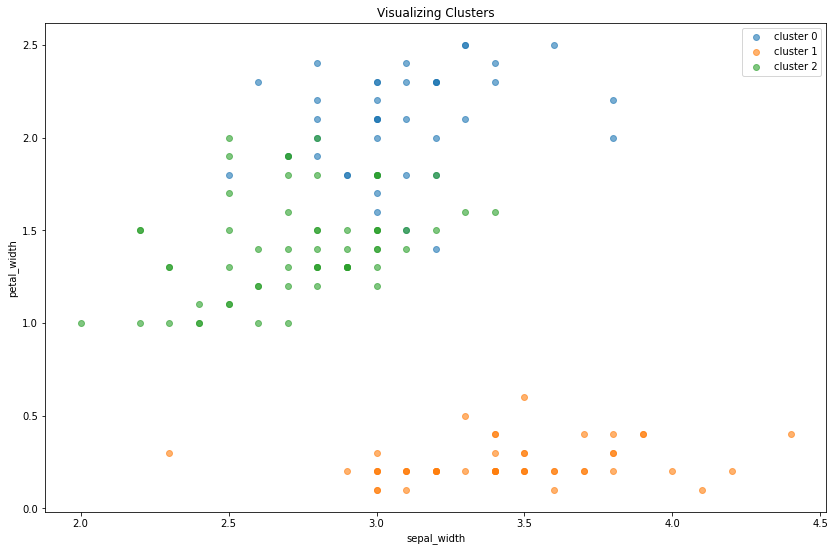

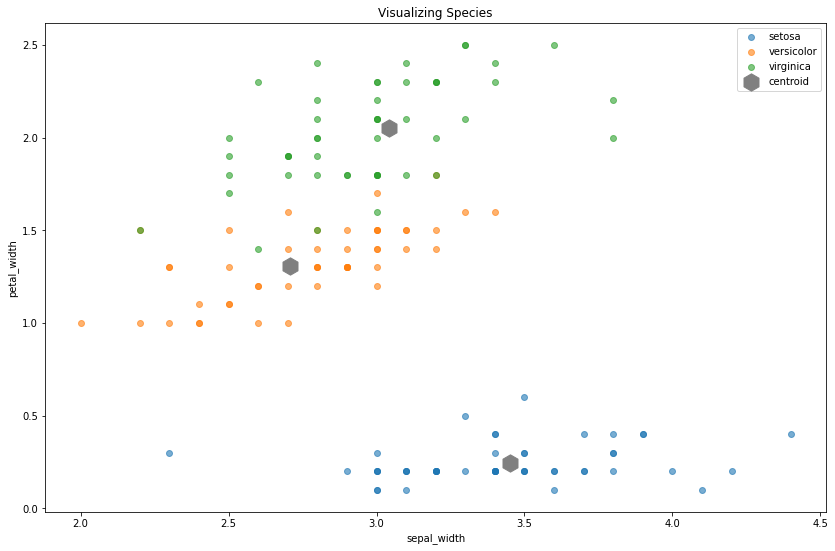

In [35]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters')
plt.show()


plt.figure(figsize=(14, 9))
for cluster, subset in iris.groupby(y):
    plt.scatter(subset.sepal_width, subset.petal_width, label=str(cluster), alpha=.6)

model_centroids.plot.scatter(y='petal_width', x='sepal_width', c='gray', marker='h', s=300, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Species')
plt.show()

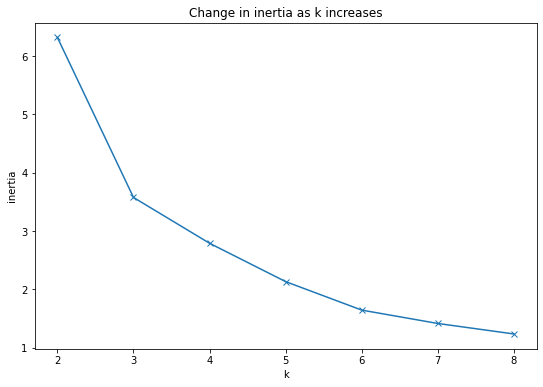

In [36]:
#surprise, 3 is a good choice bruv
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 9)}).plot(marker='x')
plt.xticks(range(2, 9))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

## Mall Madness

In [111]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
!pip install pymysql

from env import host, username, password

url = f'mysql+pymysql://{username}:{password}@{host}/mall_customers'
mall = pd.read_sql("SELECT * FROM customers", url)

mall['age_bins'] = pd.qcut(mall.age, 2, labels=["young", "old"])

mall.head()

,customer_id,gender,age,annual_income,spending_score,age_bins
0,1,Male,19,15,39,young
1,2,Male,21,15,81,young
2,3,Female,20,16,6,young
3,4,Female,23,16,77,young
4,5,Female,31,17,40,young


In [136]:
xvars = ['spending_score', 'annual_income']
X = mall[xvars]
y = mall['age_bins']
kmeans4 = make_pipeline(MinMaxScaler(), KMeans(n_clusters = 5))
kmeans4.fit(X)

mall['cluster'] = kmeans4.predict(X)

In [137]:
true_labels = y.map({'young':0, 'old':1})
pred_labels = kmeans4[1].labels_
print(silhouette_score(X, pred_labels))
print(fowlkes_mallows_score(true_labels, pred_labels)) #not really sensible for k over 2

0.553931997444648
0.40912391227026906


In [138]:
scaler = MinMaxScaler().fit(X)
unscaled_centroids = kmeans4[1].cluster_centers_
model_centroids = pd.DataFrame(scaler.inverse_transform(unscaled_centroids),
                               columns=xvars)
model_centroids

,spending_score,annual_income
0,79.363636,25.727273
1,49.518519,55.296296
2,82.128205,86.538462
3,17.114286,88.200000
4,20.913043,26.304348


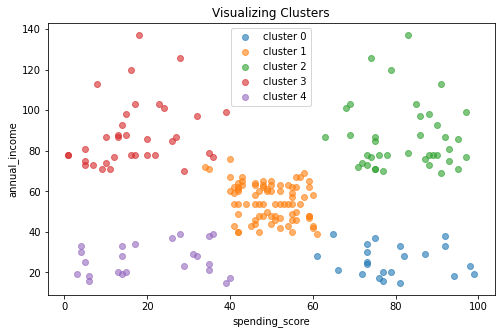

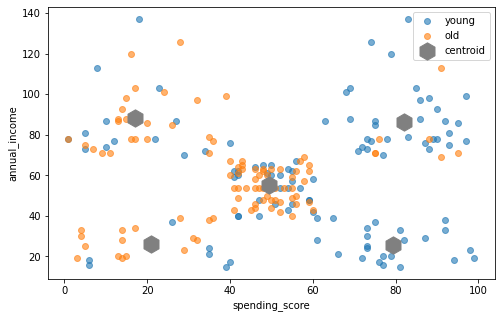

In [140]:
plt.figure(figsize=(8, 5))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(subset[xvars[0]], subset[xvars[1]], label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel(xvars[0])
plt.ylabel(xvars[1])
plt.title('Visualizing Clusters')
plt.show()

plt.figure(figsize=(8, 5))

for cluster, subset in mall.groupby(y):
    plt.scatter(subset[xvars[0]], subset[xvars[1]], label=str(cluster), alpha=.6)

model_centroids.plot.scatter(y=xvars[1], x=xvars[0], c='gray', marker='h', s=300, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel(xvars[0])
plt.ylabel(xvars[1])
plt.show()

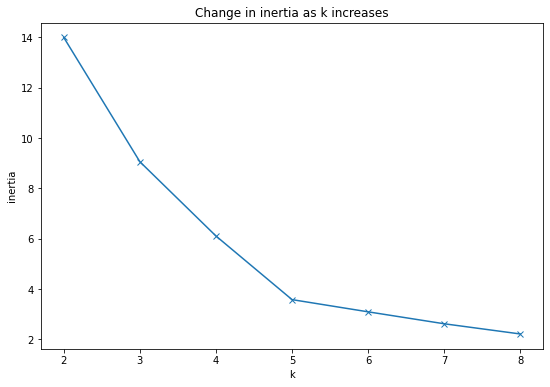

In [142]:
#5 is a good choice
plt.figure(figsize=(9, 6))
pd.Series({k: make_pipeline(MinMaxScaler(),
          KMeans(k)).fit(X)[1].inertia_ for k in range(2, 9)}).plot(marker='x')
plt.xticks(range(2, 9))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases');

Not scaling the data can squeeze data along the smaller dimension or stretch the data larger dimension. The differing scales will dominate the spatial information and make meaningful clusters impossible. Scaled data cancels out the effect of dimensional distortions and reveals clusters if they do indeed exist. The 'curse of dimensionality' makes clusters less likely to appear as dimensions are added.